Indepentent Component Analysis

1.Distritubion

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ICA algorithm, taken from https://github.com/camilleanne/pulse/blob/master/jade.py
# I made a few tiny adjustments.
import jade
import scipy
import scipy.io as sio
from pytopo import topoplotIndie
#from filterFGxfun import filterFG
from mpl_toolkits.mplot3d import Axes3D
import copy
import scipy
import scipy.io as sio
from pytopo import topoplotIndie
import jade

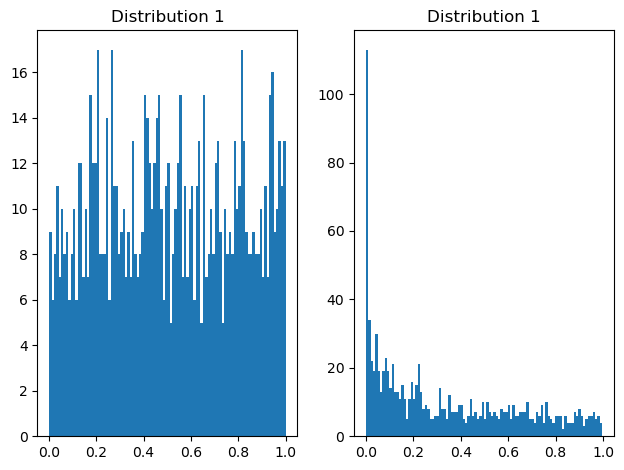

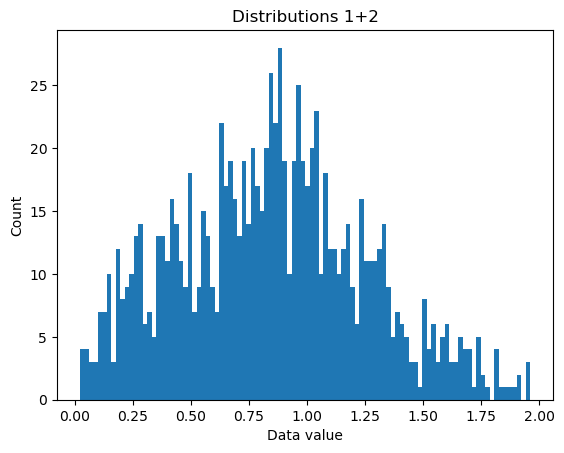

In [2]:
## some simple data

N = 1000

# a non-Gaussian distribution
dist1 = np.random.rand(N)

# another non-Gaussian distribution
dist2 = np.random.rand(N)**2

# their separate and combined distributions
_,axs = plt.subplots(1,2)
axs[0].hist(dist1,100)
axs[0].set_title('Distribution 1')

axs[1].hist(dist2,100)
axs[1].set_title('Distribution 1')
plt.tight_layout()
plt.show()

# and their summed distribution
plt.hist(dist1+dist2,100)
plt.title('Distributions 1+2')
plt.xlabel('Data value')
plt.ylabel('Count')
plt.show()

# QUESTION: What is the shape of the combined distribution? 
#           Are you surprised at the result?
#           What does this tell you about mixing distributions?

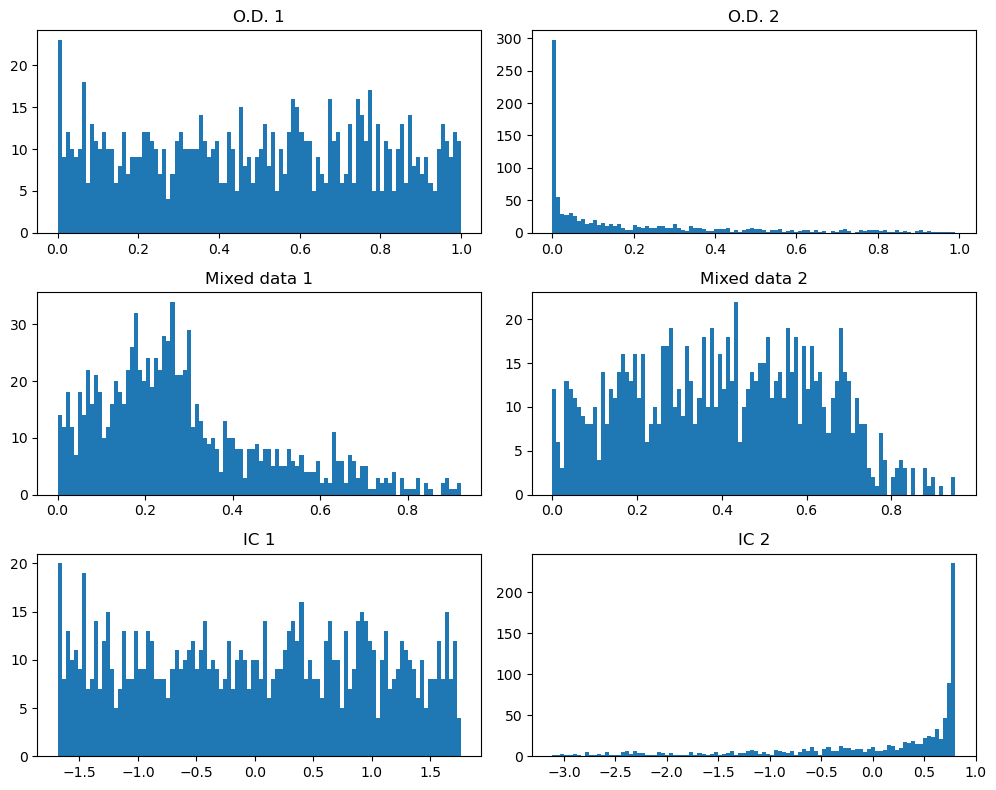

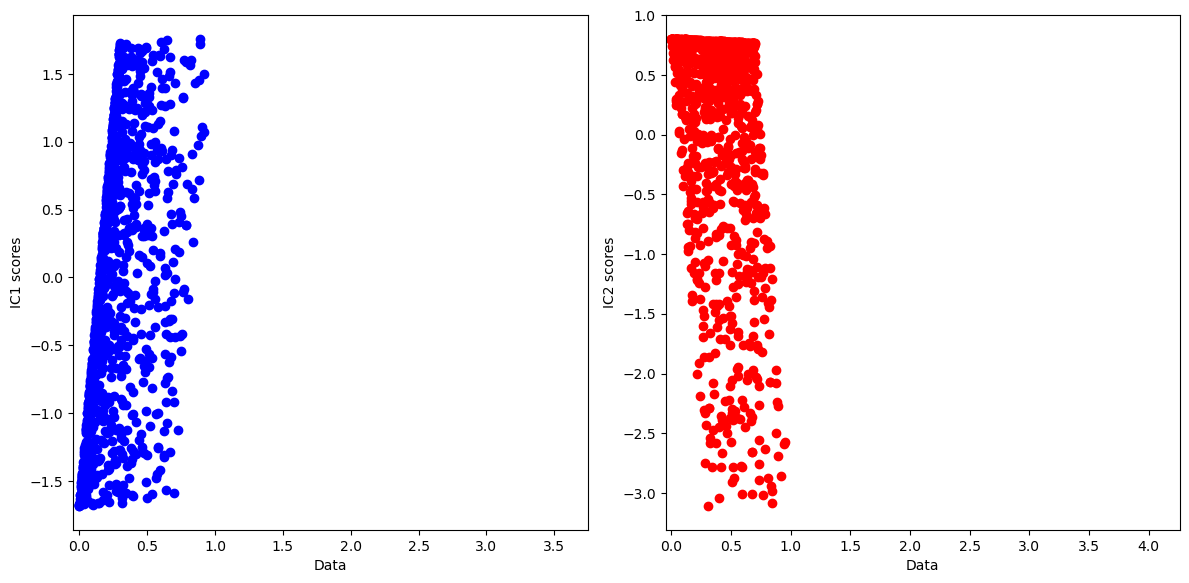

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA

# Define the number of data points
N = 1000

# Create two non-Gaussian distributions
dataO = np.zeros((2, N))
dataO[0, :] = np.random.rand(1, N)
dataO[1, :] = np.random.rand(1, N) ** 4

# Mix them into a new dataset
data = np.zeros_like(dataO)
data[0, :] = 0.3 * dataO[0, :] + 0.7 * dataO[1, :]
data[1, :] = 0.7 * dataO[0, :] + 0.3 * dataO[1, :]

# Apply ICA
ica = FastICA(n_components=2, random_state=0)
iscores = ica.fit_transform(data.T).T  # Transpose to match shape (2, N)

# Plot original and mixed data distributions
fig, axs = plt.subplots(3, 2, figsize=(10, 8))

# Original data 1
axs[0, 0].hist(dataO[0, :], bins=100)
axs[0, 0].set_title('O.D. 1')

# Original data 2
axs[0, 1].hist(dataO[1, :], bins=100)
axs[0, 1].set_title('O.D. 2')

# Mixed data 1
axs[1, 0].hist(data[0, :], bins=100)
axs[1, 0].set_title('Mixed data 1')

# Mixed data 2
axs[1, 1].hist(data[1, :], bins=100)
axs[1, 1].set_title('Mixed data 2')

# IC 1
axs[2, 0].hist(iscores[0, :], bins=100)
axs[2, 0].set_title('IC 1')

# IC 2
axs[2, 1].hist(iscores[1, :], bins=100)
axs[2, 1].set_title('IC 2')

plt.tight_layout()
plt.show()

# Now plot data as a function of ICs
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot data vs IC1 scores
axs[0].scatter(data[0, :], iscores[0, :], color='b', marker='o')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('IC1 scores')
axs[0].axis('square')

# Plot data vs IC2 scores
axs[1].scatter(data[1, :], iscores[1, :], color='r', marker='o')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('IC2 scores')
axs[1].axis('square')

plt.tight_layout()
plt.show()


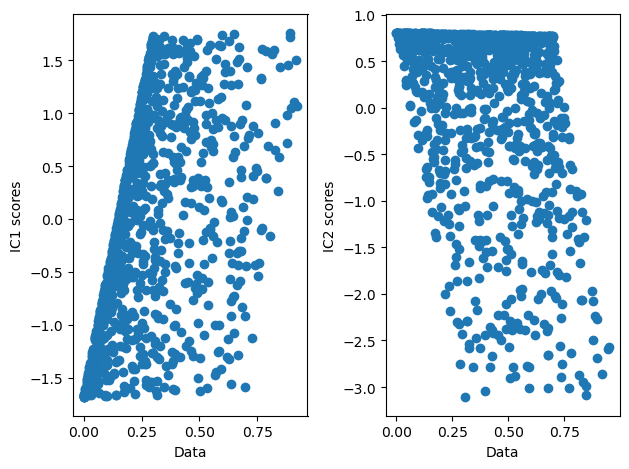

In [4]:
# now plot data as a function of ICs

_,axs = plt.subplots(1,2)
axs[0].plot(data[0,:],iscores[0,:],'o')
axs[0].set_xlabel('Data')
axs[0].set_ylabel('IC1 scores')

axs[1].plot(data[1,:],iscores[1,:],'o')
axs[1].set_xlabel('Data')
axs[1].set_ylabel('IC2 scores')

plt.tight_layout()
plt.show()

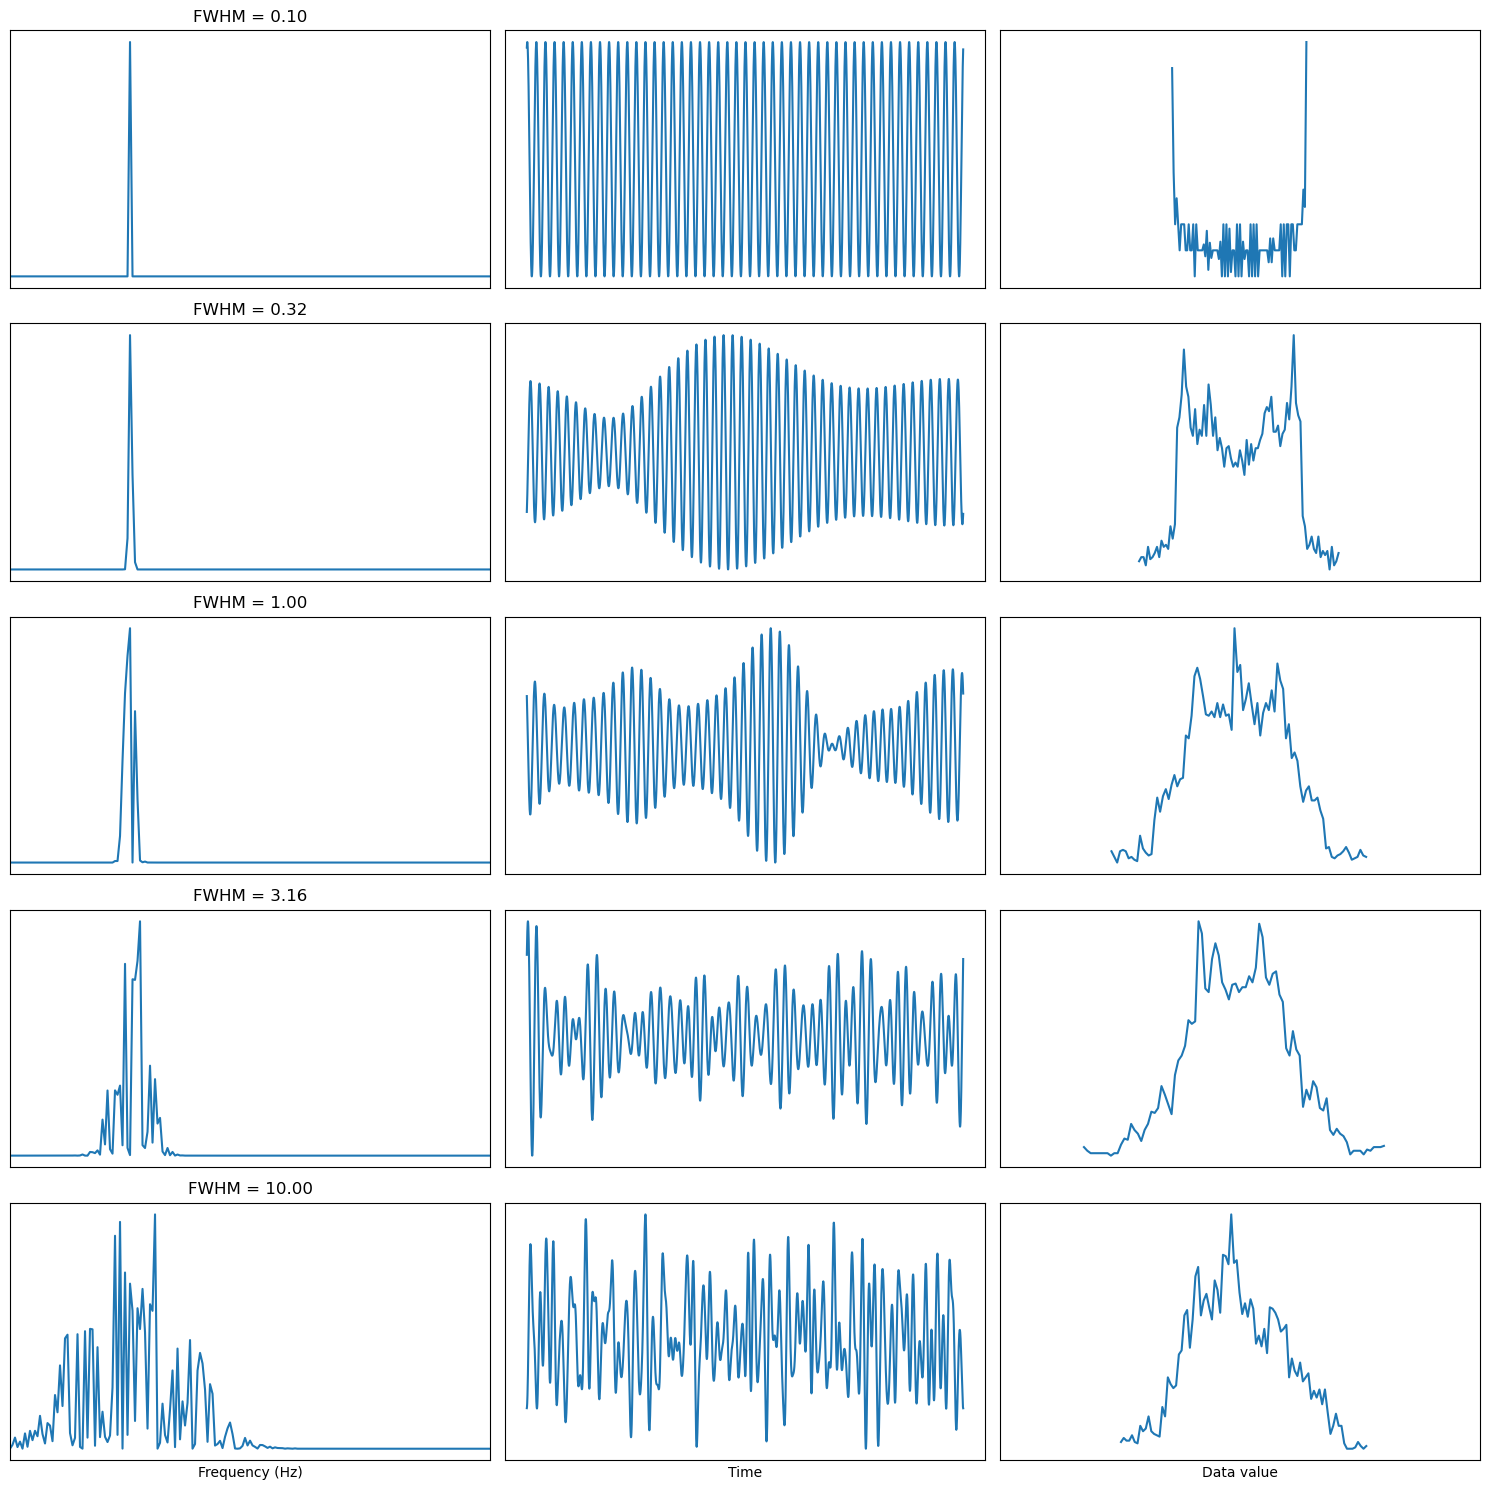

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
pnts = 6000
srate = 1000

# Frequencies
hz = np.linspace(0, srate, pnts)

# Specify a range of FWHM
minFWHM = 0.1  # in Hz
maxFWHM = 10   # also in Hz

# Specify range of FWHM values
fwhm = np.logspace(np.log10(0.1), np.log10(10), 5)
peakfreq = 8

# Create a figure
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

# Loop through each FWHM value
for fwhmi in range(5):
    # Create frequency-domain Gaussian
    s = fwhm[fwhmi] * (2 * np.pi - 1) / (4 * np.pi)  # normalized width
    x = hz - peakfreq  # shifted frequencies
    fg = np.exp(-0.5 * (x / s) ** 2)  # Gaussian
    
    # Random Fourier coefficients and apply the Gaussian taper
    fc = np.random.rand(pnts) * np.exp(1j * 2 * np.pi * np.random.rand(pnts))
    fc *= fg
    
    # Create the time-domain signal using inverse FFT, and normalize
    sig = np.real(np.fft.ifft(fc))
    sig = (sig - np.mean(sig)) / np.std(sig)
    
    # Plot the power spectrum
    axs[fwhmi, 0].plot(hz, np.abs(fc) ** 2)
    axs[fwhmi, 0].set_xlim([0, peakfreq * 4])
    axs[fwhmi, 0].set_xticks([])
    axs[fwhmi, 0].set_yticks([])
    axs[fwhmi, 0].set_title(f'FWHM = {fwhm[fwhmi]:.2f}')
    if fwhmi == 4:
        axs[fwhmi, 0].set_xlabel('Frequency (Hz)')
    
    # Plot the time-domain signal
    axs[fwhmi, 1].plot(sig)
    axs[fwhmi, 1].set_yticks([])
    axs[fwhmi, 1].set_xticks([])
    if fwhmi == 4:
        axs[fwhmi, 1].set_xlabel('Time')
    
    # Plot the histogram
    yh, xh = np.histogram(sig, bins=90)
    axs[fwhmi, 2].plot(xh[:-1], yh)
    axs[fwhmi, 2].set_xlim([-5, 5])  # Fixed xlim range
    axs[fwhmi, 2].set_xticks([])
    axs[fwhmi, 2].set_yticks([])
    if fwhmi == 4:
        axs[fwhmi, 2].set_xlabel('Data value')

plt.tight_layout()
plt.show()


2.Explore IC distributions in real data

In [6]:
## preliminary 

# mat file containing EEG data
matfile = sio.loadmat('restingstate64chans.mat')
EEG = matfile['EEG'][0,0]

tmpdat = (EEG['icaweights']@EEG['icasphere'])@np.reshape(EEG['data'],(EEG['nbchan'][0][0],-1),order='F')
EEG['icaact'] = np.reshape(tmpdat,(EEG['data'].shape))


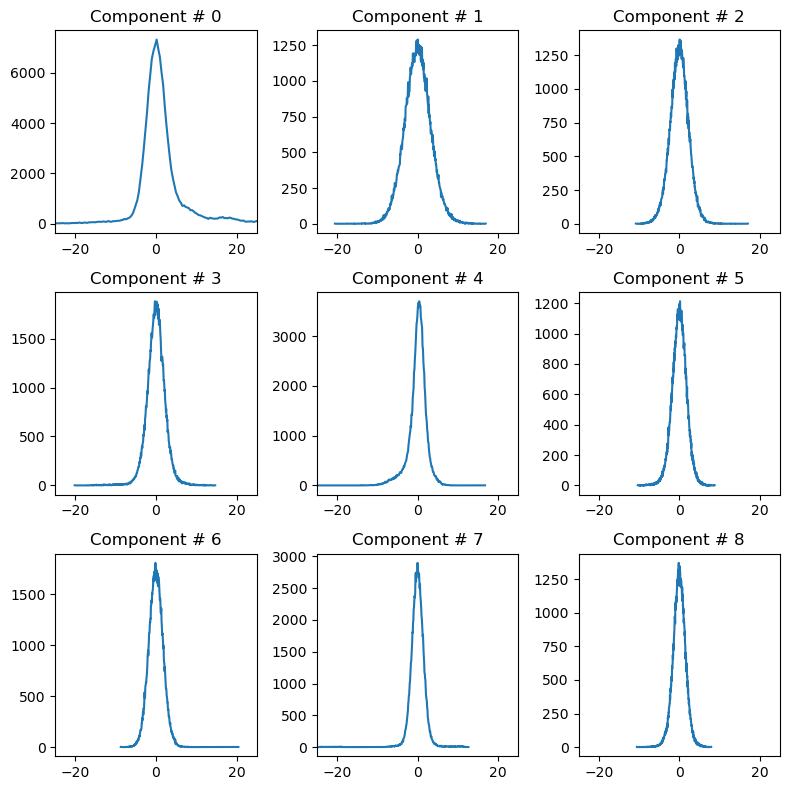

In [7]:
## show IC topographies and data distributions

# histogram parameters and output matrices
nbins = 500
x = np.zeros((9,nbins))
y = np.zeros((9,nbins))

_,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()

# let's inspect the first 9 components
for i in range(9):
    
    # plot distribution
    binY,binX = np.histogram(EEG['icaact'][i,:],bins=nbins)
    binX = (binX[:-1]+binX[1:])/2
    axs[i].plot(binX,binY)
    axs[i].set_xlim([-25,25])
    axs[i].set_title(f'Component # {i}')
    
    # store normalized histograms for later
    y[i,:] = binY / np.max(binY)
    x[i,:] = binX
    

plt.tight_layout()
plt.show()

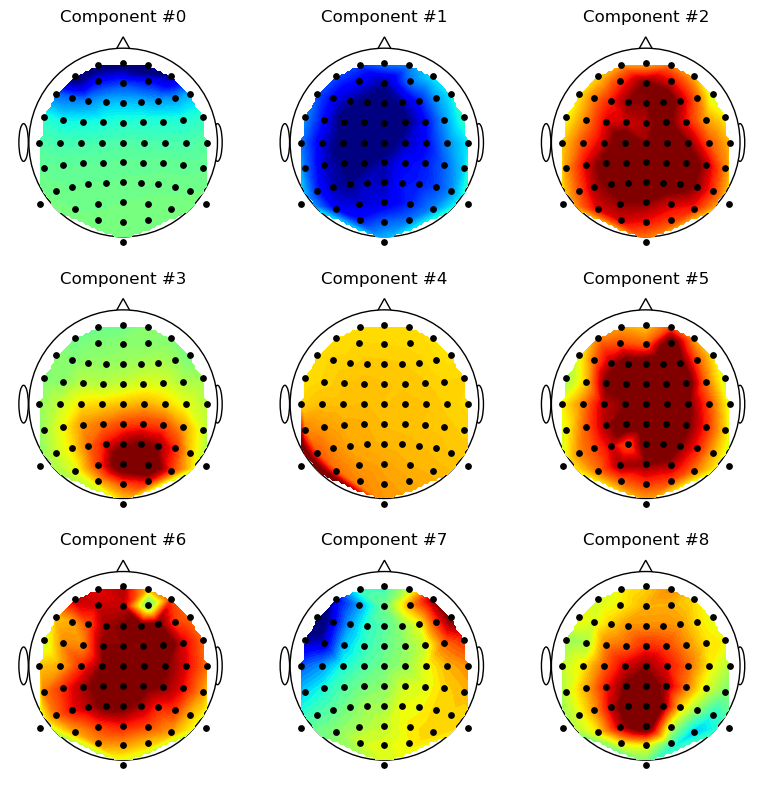

In [8]:
_,axs = plt.subplots(3,3,figsize=(8,8))
axs = axs.flatten()

# let's inspect the first 9 components
for i in range(9):
    # plot topographical maps
    topoplotIndie(EEG['icawinv'][:,i],EEG['chanlocs'],f'Component #{i}',axs[i])

plt.tight_layout()
plt.show()

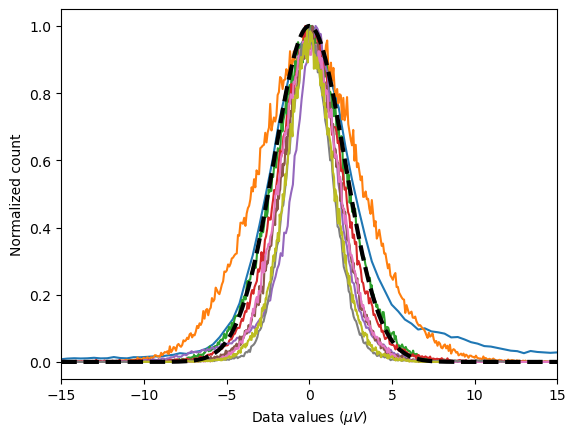

In [9]:
## show all distributions in one plot

plt.plot(x.T,y.T)
plt.xlim([-15,15])


# for comparison, a Gaussian on top
h = 5
t = np.linspace(-15,15,301)
g = np.exp( -4*np.log(2)*t**2 / h**2 )
plt.plot(t,g,'k--',linewidth=3)

plt.xlabel('Data values ($\mu V$)')
plt.ylabel('Normalized count')
plt.show()

3.ICA, PCA, GED on simulated data

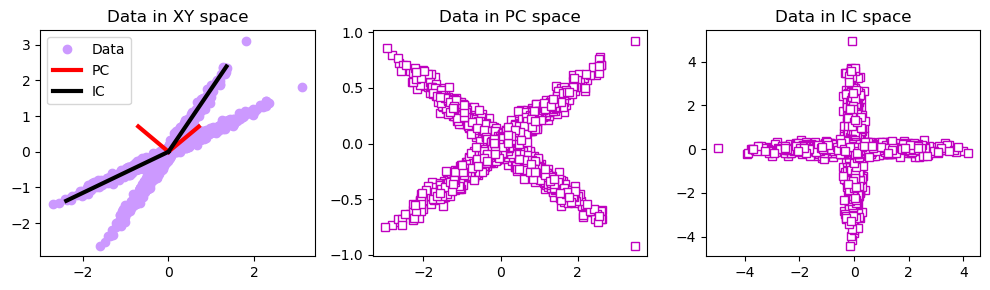

In [10]:
# simple example of the "X" data

## generate data
x = np.random.randn(1000,2)
x[:,1] *= .05

# rotation matrix
th = -np.pi/6
R1 = [ [np.cos(th),-np.sin(th)], [np.sin(th),np.cos(th)] ]
th = -np.pi/3
R2 = [ [np.cos(th),-np.sin(th)], [np.sin(th),np.cos(th)] ]

# rotate data
y = np.concatenate((x@R1,x@R2))

# now PCA
y[:,0] -= np.mean(y[:,0])
y[:,1] -= np.mean(y[:,1])
evalsY,evecsY = np.linalg.eig( (y.T@y) / len(y) )
# compute PC scores
pc1 = y@evecsY[:,0]
pc2 = y@evecsY[:,1]

# now ICA
ivecs = jade.main(y.T)[0]
ic_scores = np.array(ivecs)@y.T



### plotting
_,axs = plt.subplots(1,3,figsize=(10,3))
axs[0].plot(y[:,0],y[:,1],'o',label='Data',color=[.8,.6,1])
axs[0].plot([0,evecsY[0,0]],[0,evecsY[1,0]],'r',linewidth=3,label='PC')
axs[0].plot([0,evecsY[0,1]],[0,evecsY[1,1]],'r',linewidth=3)
axs[0].plot([0,ivecs[0,0]],[0,ivecs[1,0]],'k',linewidth=3,label='IC')
axs[0].plot([0,ivecs[0,1]],[0,ivecs[1,1]],'k',linewidth=3)
axs[0].legend()
axs[0].set_title('Data in XY space')

# data in PC space
axs[1].plot(pc1,pc2,'ms',markerfacecolor='w')
axs[1].set_title('Data in PC space')

# data in IC space
axs[2].plot(ic_scores[0,:],ic_scores[1,:],'ms',markerfacecolor='w')
axs[2].set_title('Data in IC space')

plt.tight_layout()
plt.show()


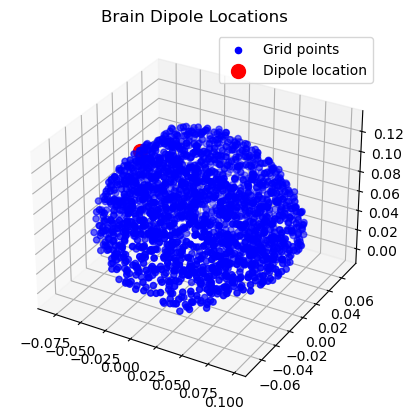

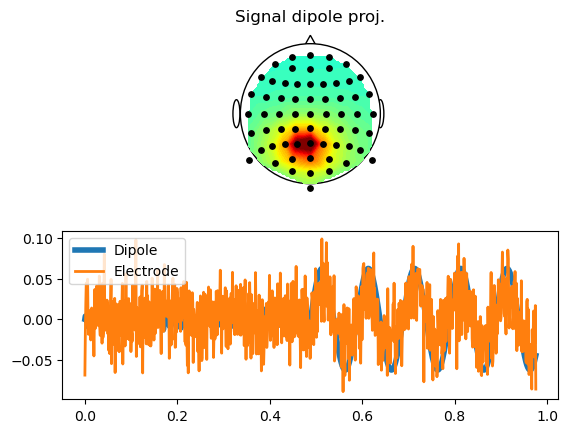

In [11]:
## preliminary 

# mat file containing EEG, leadfield and channel locations
matfile = sio.loadmat('emptyEEG')
lf = matfile['lf'][0,0]
EEG = matfile['EEG'][0,0]

diploc = 108

# normal dipoles (normal to the surface of the cortex)
lf_GainN = np.zeros((64,2004))
for i in range(3):
    lf_GainN += lf['Gain'][:,i,:]*lf['GridOrient'][:,i]


### simulate the data
dipole_data = 1*np.random.randn(lf['Gain'].shape[2],1000)
# add signal to second half of dataset
dipole_data[diploc,500:] = 15*np.sin(2*np.pi*10*np.arange(500)/EEG['srate'])
# project dipole data to scalp electrodes
EEG['data'] = lf_GainN@dipole_data
# meaningless time series
EEG['times'] = np.squeeze(np.arange(EEG['data'].shape[1])/EEG['srate'])







# Plot brain dipoles
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot all grid locations
ax.scatter(lf['GridLoc'][:, 0], lf['GridLoc'][:, 1], lf['GridLoc'][:, 2], c='b', label='Grid points')

# Plot the specific dipole location
ax.scatter(lf['GridLoc'][diploc, 0], lf['GridLoc'][diploc, 1], lf['GridLoc'][diploc, 2], c='r', s=100, label='Dipole location')

# Add title and legend
ax.set_title('Brain Dipole Locations')
ax.legend()

# Show the plot
plt.show()
_,axs = plt.subplots(2,1)
topoplotIndie(lf_GainN[:,diploc],EEG['chanlocs'],'Signal dipole proj.',axs[0])

axs[1].plot(EEG['times'],dipole_data[diploc,:]/np.linalg.norm(dipole_data[diploc,:]),linewidth=4,label='Dipole')
axs[1].plot(EEG['times'],EEG['data'][30,:]/np.linalg.norm(EEG['data'][30,:]),linewidth=2,label='Electrode')
axs[1].legend()
plt.show()

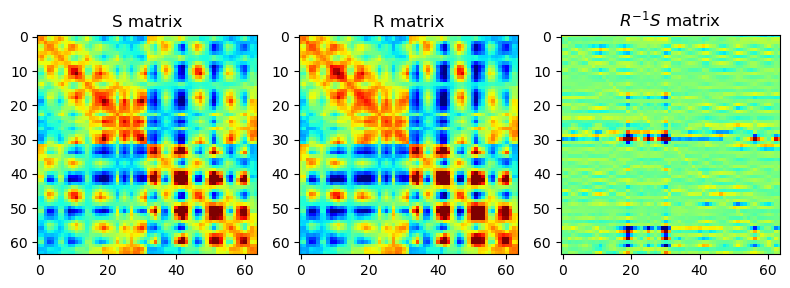

In [12]:
## Create covariance matrices

# compute covariance matrix R is first half of data
tmpd = EEG['data'][:,:500]
covR = np.cov(tmpd)

# compute covariance matrix S is second half of data
tmpd = EEG['data'][:,500:]
covS = np.cov(tmpd)


### plot the two covariance matrices
_,axs = plt.subplots(1,3,figsize=(8,4))

# S matrix
axs[0].imshow(covS,vmin=-1e6,vmax=1e6,cmap='jet')
axs[0].set_title('S matrix')

# R matrix
axs[1].imshow(covR,vmin=-1e6,vmax=1e6,cmap='jet')
axs[1].set_title('R matrix')

# R^{-1}S
axs[2].imshow(np.linalg.inv(covR)@covS,vmin=-10,vmax=10,cmap='jet')
axs[2].set_title('$R^{-1}S$ matrix')

plt.tight_layout()
plt.show()

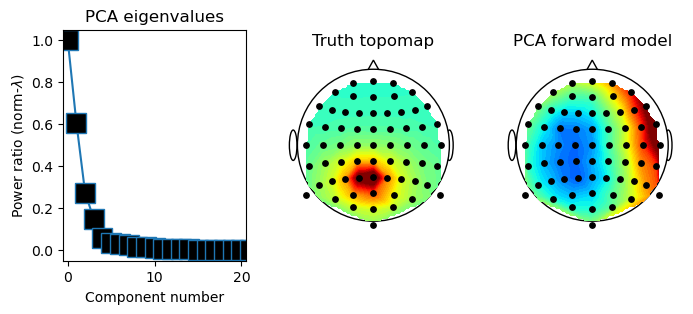

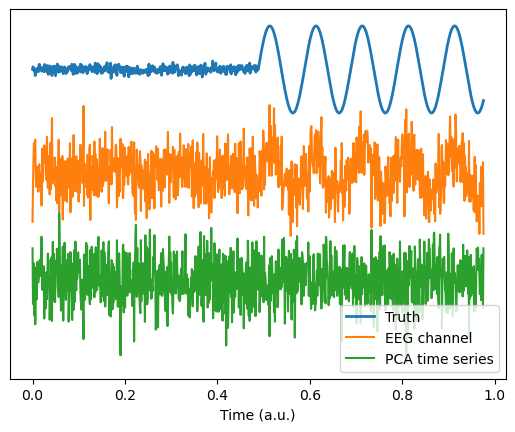

In [13]:
## Dimension compression via PCA

# PCA
evals,evecs = scipy.linalg.eigh(covS+covR)

# sort eigenvalues/vectors
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]



# plot the eigenspectrum
_,axs = plt.subplots(1,3,figsize=(8,3))
axs[0].plot(evals/np.max(evals),'s-',markersize=15,markerfacecolor='k')
axs[0].set_xlim([-.5,20.5])
axs[0].set_title('PCA eigenvalues')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Power ratio (norm-$\lambda$)')

# filter forward model
filt_topo = evecs[:,0]

# Eigenvector sign
se = np.argmax(np.abs( filt_topo ))
filt_topo = filt_topo * np.sign(filt_topo[se])

# plot the maps
topoplotIndie(lf_GainN[:,diploc],EEG['chanlocs'],'Truth topomap',axs[1])
topoplotIndie(filt_topo,EEG['chanlocs'],'PCA forward model',axs[2])

plt.show()



# component time series is eigenvector as spatial filter for data
comp_ts = evecs[:,0].T@EEG['data']


# normalize time series (for visualization)
dipl_ts = dipole_data[diploc,:] / np.linalg.norm(dipole_data[diploc,:])
comp_ts = comp_ts / np.linalg.norm(comp_ts)
chan_ts = EEG['data'][30,:] / np.linalg.norm(EEG['data'][30,:])


# plot the time series
plt.plot(EEG['times'],.3+dipl_ts,linewidth=2)
plt.plot(EEG['times'],.15+chan_ts)
plt.plot(EEG['times'],comp_ts)
plt.legend(['Truth','EEG channel','PCA time series'])
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.show()

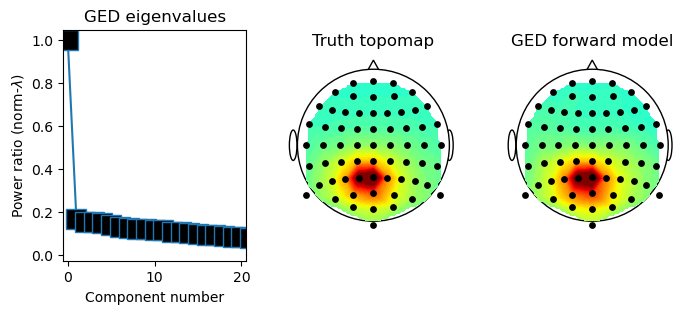

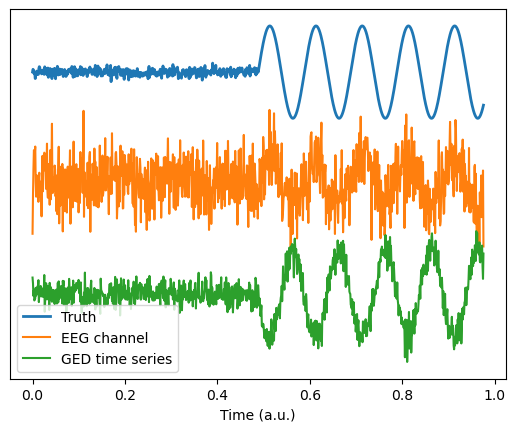

In [14]:
## Source separation via GED

# GED
evals,evecs = scipy.linalg.eigh(covS,covR)

# sort eigenvalues/vectors
sidx  = np.argsort(evals)[::-1]
evals = evals[sidx]
evecs = evecs[:,sidx]



# plot the eigenspectrum
_,axs = plt.subplots(1,3,figsize=(8,3))
axs[0].plot(evals/np.max(evals),'s-',markersize=15,markerfacecolor='k')
axs[0].set_xlim([-.5,20.5])
axs[0].set_title('GED eigenvalues')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Power ratio (norm-$\lambda$)')

# filter forward model
filt_topo = evecs[:,0].T@covS

# Eigenvector sign
se = np.argmax(np.abs( filt_topo ))
filt_topo = filt_topo * np.sign(filt_topo[se])

# plot the maps
topoplotIndie(lf_GainN[:,diploc],EEG['chanlocs'],'Truth topomap',axs[1])
topoplotIndie(filt_topo,EEG['chanlocs'],'GED forward model',axs[2])

plt.show()



# component time series is eigenvector as spatial filter for data
comp_ts = evecs[:,0].T@EEG['data']


# normalize time series (for visualization)
comp_ts = comp_ts / np.linalg.norm(comp_ts)


# plot the time series
plt.plot(EEG['times'],.3+dipl_ts,linewidth=2)
plt.plot(EEG['times'],.15+chan_ts)
plt.plot(EEG['times'],comp_ts)
plt.legend(['Truth','EEG channel','GED time series'])
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.show()

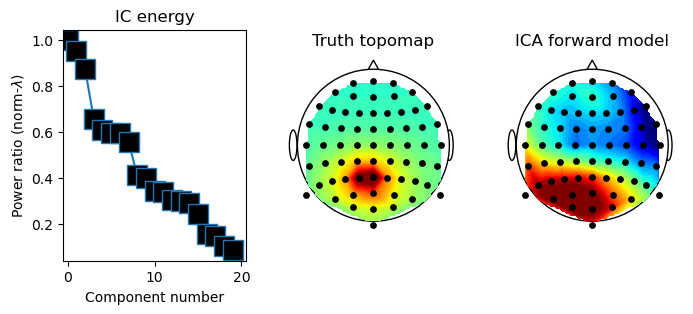

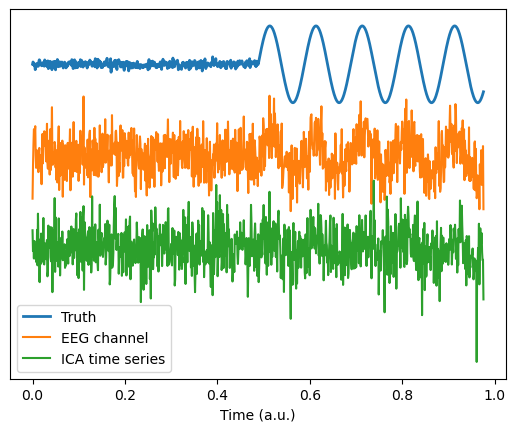

In [15]:
## Source separation via ICA

# NOTE: ICA takes several minutes to compute. Have patience...

# ICA and scores
icvecs = jade.main(EEG['data'],20)[0]
icvecs = np.array( icvecs )
ICs    = icvecs[0,:]@EEG['data']
icmaps = np.linalg.pinv(icvecs.T)
ICenergy = np.sum(icmaps**2,axis=1)



# plot component energy
_,axs = plt.subplots(1,3,figsize=(8,3)) 
axs[0].plot(ICenergy/np.max(ICenergy),'s-',markersize=15,markerfacecolor='k')
axs[0].set_xlim([-.5,20.5])
axs[0].set_title('IC energy')
axs[0].set_xlabel('Component number')
axs[0].set_ylabel('Power ratio (norm-$\lambda$)')

# plot the maps
topoplotIndie(lf_GainN[:,diploc],EEG['chanlocs'],'Truth topomap',axs[1])
topoplotIndie(icmaps[0,:],EEG['chanlocs'],'ICA forward model',axs[2])

plt.show()



# component time series is eigenvector as spatial filter for data
comp_ts = evecs[:,0].T@EEG['data']


# normalize time series (for visualization)
comp_ts = ICs / np.linalg.norm(ICs)


# plot the time series
plt.plot(EEG['times'],.3+dipl_ts,linewidth=2)
plt.plot(EEG['times'],.15+chan_ts)
plt.plot(EEG['times'],comp_ts.T)
plt.legend(['Truth','EEG channel','ICA time series'])
plt.yticks([])
plt.xlabel('Time (a.u.)')
plt.show()

In [16]:
### Note about the visualization of the ICs:
# The columns correspond to vectors that are orthogonal in the 
# IC space -- though they are not orthogonal in the data space.
# That's why they point along the data directions.
# Therefore, plotting the columns of the IC matrix is actually not
# the IC _projection_ vectors, but the IC-space _basis vectors_.
# Plotting the rows of the IC matrix in the data space is the projection
# vectors, which are orthogonal to the two "streams" of data
# (each leg of the "X" pattern).